# Facebook's Prophet Library

## Importing the data

👇 Go on [trends.google.com](https://trends.google.com/trends/?geo=US) and retrieve the dataset representing the interest over time of the keyword `data science` since 2004 in the US. Once you get the dataset, import the data and display the first few rows

In [1]:
! pip install pystan

In [2]:
! pip install fbprophet

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import scipy
import pandas as pd

In [110]:
import warnings
import pandas as pd
 
 
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
 
import seaborn as sns
sns.set()
sns.set(rc={'figure.figsize':(14.7,10.27)})
 
from plotly import tools
import plotly.graph_objs as go
import gc
import plotly.express as px

In [111]:
from datetime import datetime
 # prophet model 
from fbprophet import Prophet

## Display the data

👇Visualize the data by displaying the first few rows of the dataframe

In [131]:
#Évolution de l'intérêt pour le Vaccin Covid
data = pd.read_csv('/content/drive/MyDrive/PROPHET Facebook/multiTimeline.csv',header=1)
#data.isna().sum()
type(data)

pandas.core.frame.DataFrame

In [132]:
data.head(2)

,Mois,data science: (États-Unis)
0,2004-01,17
1,2004-02,11


## Data Preprocessing

Facebook'Prophet library requires the data to be in a specific format. 

👇 Format the dataset as per Facebook Prophet's requirements.
Remember the dataframe should have a `ds` and `y` columns

In [114]:
data.index

RangeIndex(start=0, stop=52, step=1)

In [133]:
data_rename = data.rename(columns={'Mois':'ds','data science: (États-Unis)':'y'})
data_rename.head(2)

,ds,y
0,2004-01,17
1,2004-02,11


In [134]:
#POUR PREPARER LES DONN2ES ON JUSTE BESOIN DE RENOME LES VARIABLES
data.columns = ["ds", "y"]

In [135]:
data.head(3)

,ds,y
0,2004-01,17
1,2004-02,11
2,2004-03,7


## Plotting the data

👇 Plot the data

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


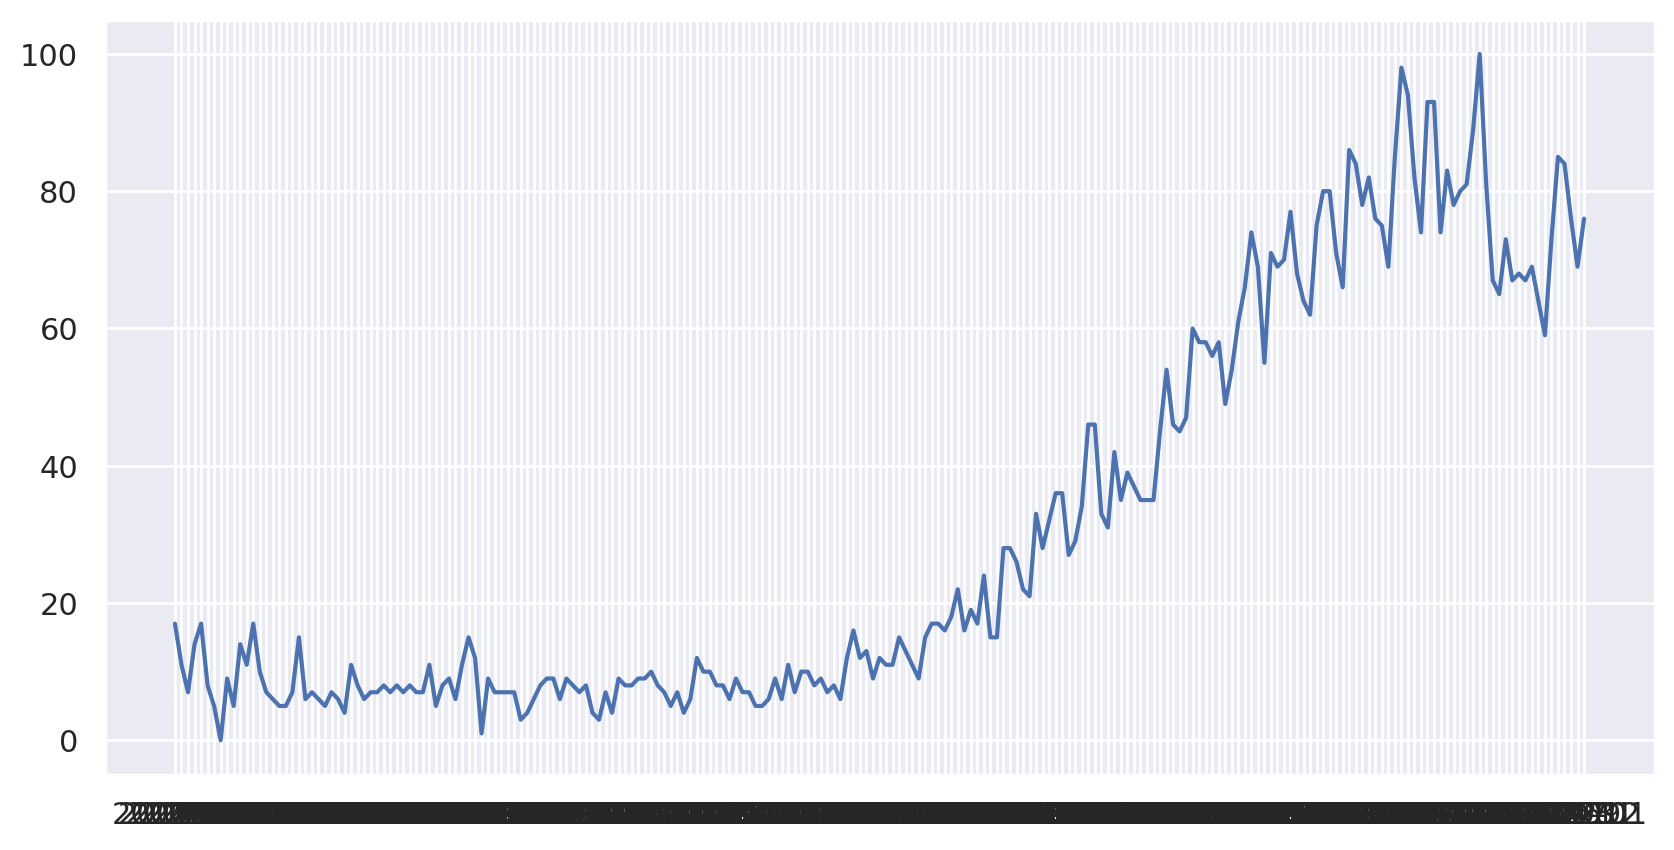

In [136]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5), dpi=100);
plt.plot(data.ds, data.y);

In [137]:
# Evolution au cours des semaine par rapport au temps
px.area(x='ds', y= 'y', data_frame=data)

In [138]:
#Construire une boite à moustache pour avoir certaine caracteristiques
px.box(y='y', data_frame=data)

In [139]:
#Histograme
px.histogram(data.ds, data.y)

## Fitting the data

👇 Fit the data using Facebook's Prophet library. Make sure to use a train/test split

In [140]:
from fbprophet import Prophet
# Your code here

#Initialise l'algo
model = Prophet()

#Entrainement de l'algo
resultat = model.fit(data_rename)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Make future predictions

👇Before predicting future values with Facebook's Prophet library, you first need to create a placeholder dataframe that will eventually hold the predictions. Once you create the dataframe, try to predict 2 years in the future.

You can create the predictions' dataframe using `make_future_dataframe()`

In [141]:
#Prevision
# Creer la data qui va stocke des previsions(1year = 365 + 365)
future_data = model.make_future_dataframe(periods=730)
future_data.head(3)

,ds
0,2004-01-01
1,2004-02-01
2,2004-03-01


In [142]:
#Prevision(prediction)
forecast = model.predict(future_data)
forecast.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-01-01,8.084154,5.222513,19.285046,8.084154,8.084154,3.892135,3.892135,3.892135,3.892135,3.892135,3.892135,0.0,0.0,0.0,11.976289
1,2004-02-01,8.078801,1.684763,16.278903,8.078801,8.078801,1.035000,1.035000,1.035000,1.035000,1.035000,1.035000,0.0,0.0,0.0,9.113801


In [143]:
# Python
forecast = model.predict(future_data)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
#yhat_lower	yhat_upper: c'est l'interval de confiance
#yhat: Ce sont les previsions, les valeurs predite par le model

,ds,yhat,yhat_lower,yhat_upper
942,2023-12-28,104.783560,97.688811,112.237711
943,2023-12-29,102.140020,94.719175,109.115418
944,2023-12-30,99.740168,91.897948,107.629455
945,2023-12-31,97.617816,90.188795,105.349766
946,2024-01-01,95.797627,88.094701,103.486334


## Plotting the forecast

👇 It's time to visualize our forecast. Make use of the handy [`model.plot(forecast)`](https://facebook.github.io/prophet/docs/quick_start.html)

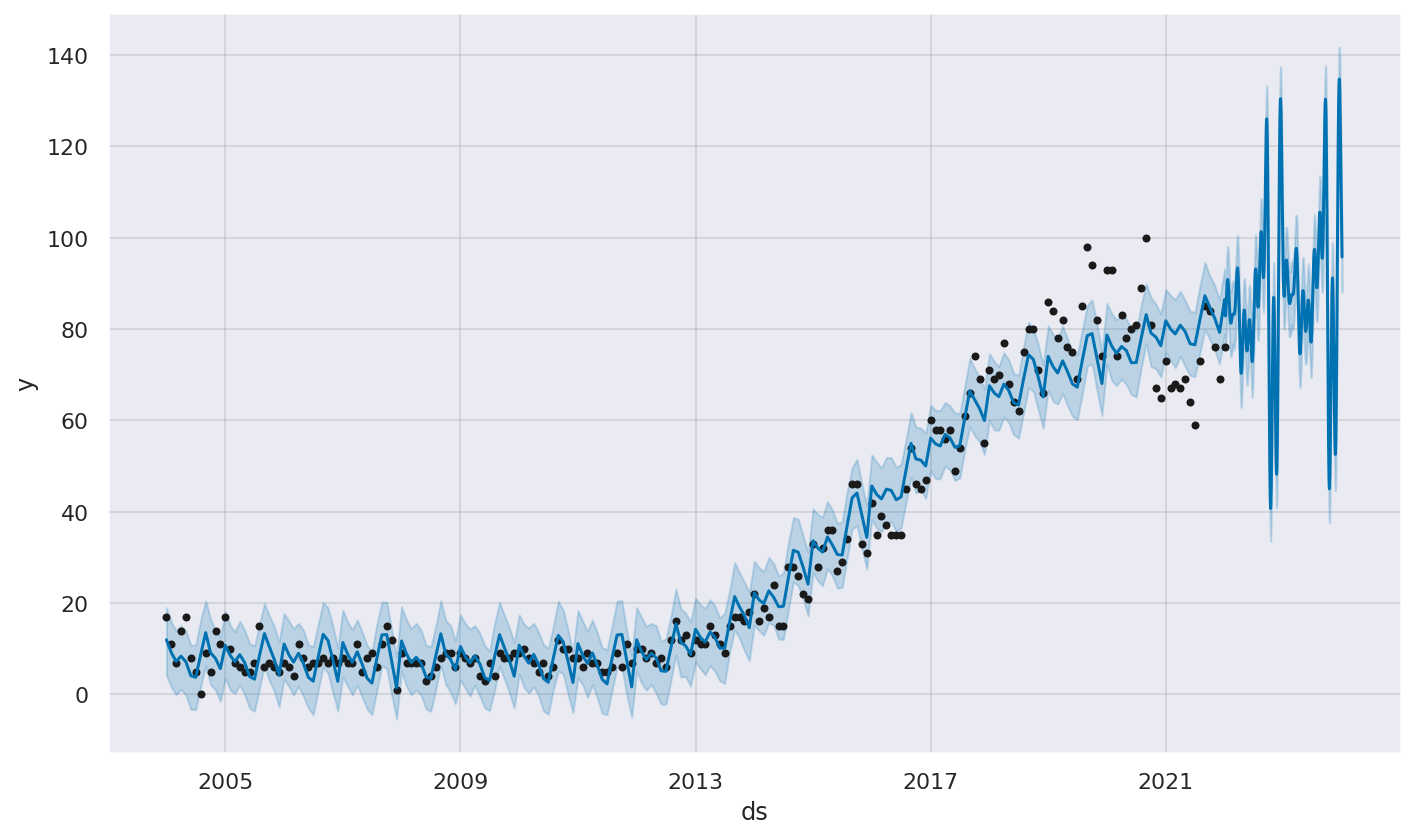

In [144]:
# C'est plus interressant de visualiser pour mieux comprendre
fig1 = model.plot(forecast)
# On bleu : les valeurs predictes
# On noir: les valeurs observes
# CONCLUSION : le model est tres mauvais il ne suis pas la tendance

In [128]:
! pip install pystan==2.19.1.1

In [145]:
! pip install prophet

In [146]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model, forecast)

👉 From 2004 to 2018 we can see the train data and the forecasted data from 2018 to 2020.

We can also notice a shaded region behind the plot which represents the 95% uncertainty interval.

The black dots represent the original data

## Time Series' trend and seasonality

👇 Plot the trend and yearly seasonality of the time series. This can be done using the `plot_components()` function from Facebook's Prophet Library

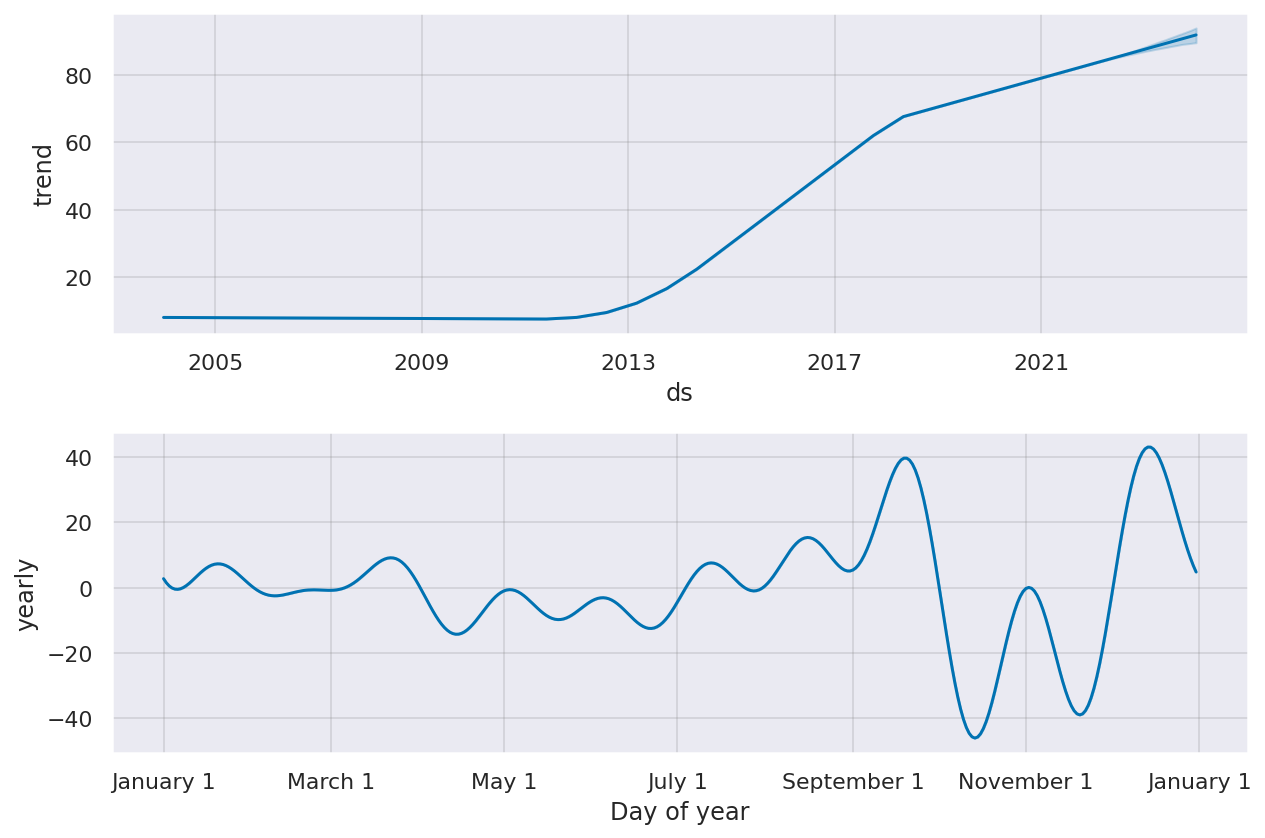

In [147]:
# Une autre type de visualisation
fig2 = model.plot_components(forecast)
#On observe que la tendance de la vaccination de la Covid_19 ne fait que decroitre 

## Evaluating the model with cross-validation!

👇 Using `cross_validation` and `performance_metrics` from [fbprophet.diagnostics](https://facebook.github.io/prophet/docs/diagnostics.html), evaluate the performance of your model
<img src='https://facebook.github.io/prophet/static/diagnostics_files/diagnostics_3_0.png'>

More precisely, create a Time Series K-fold CV with
- train sets of size 5 years
- horizon val sizes of 1 years
- shifting each fold by 180 days

In [149]:
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
# Your code here

# validation croisée 
df_cv = cross_validation(model, initial='180 days', period='1825 days', horizon = '365 days')

INFO:fbprophet:Making 4 forecasts with cutoffs between 2006-01-05 00:00:00 and 2021-01-01 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


In [ ]:
# Plot results below
from fbprophet.plot import plot_cross_validation_metric

In [150]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2006-02-01,6.235863,3.727427,8.649038,6,2006-01-05
1,2006-03-01,15.573252,13.080820,17.990897,4,2006-01-05
2,2006-04-01,3.141635,0.808844,5.738016,11,2006-01-05
3,2006-05-01,-5.600466,-7.997308,-3.221931,8,2006-01-05
4,2006-06-01,-0.998294,-3.580814,1.621426,6,2006-01-05


In [152]:
#La méthode cross_validation nous renvoie un dataframe contenant les valeurs réelles y et yhat les valeurs prédites.
#Nous utiliserons ce dataframe pour calculer les erreurs de prédiction.
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,31 days,215.281216,14.672465,8.363479,0.200769,0.163984,0.75
1,55 days,248.752351,15.771885,11.197826,0.914270,0.346510,0.50
2,56 days,249.393967,15.792212,11.368116,0.911756,0.341482,0.50
3,58 days,249.658600,15.800589,11.419425,0.911258,0.341482,0.50
4,59 days,198.835667,14.100910,10.489951,0.895987,0.310940,0.50


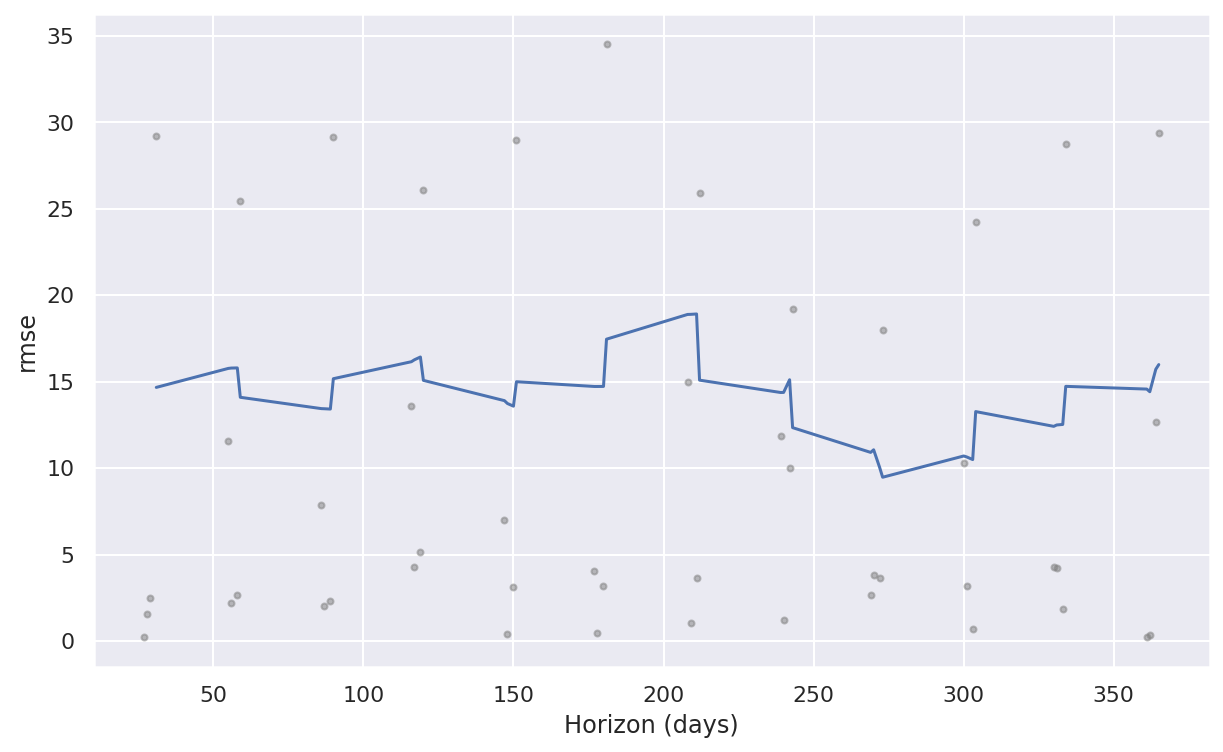

In [153]:
#On a un bon nombre de métriques d’erreurs. Intéressons-nous à erreur quadratique moyenne RMSE.
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

⚠️ Don't forget to push the challenge to GitHub once you're done 😄

Nous voyons que l’erreur suit la tendance de la prevision en fonction de la période de prévision. Ainsi, avec cette configuration nous pourrons avoir des prévisions a peu pres fiables sur l'année.